In [1]:
# We import Linear algebra functionality
import numpy as np
#We import data procession functionality
import pandas as pd
# Sklearn functionality
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# it is a magic function that renders the figure in a notebook
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from subprocess import check_output

#Now first we read the files
data1 = pd.read_csv('../input/kc_house_data.csv', usecols = ['sqft_living', 'price'], sep = ',')
print(data1.head())

print(data1.shape)
# Now defining various variable i.e. sq. feets and price associated with it
price = data1.iloc[: ,0:1] 
sqft = data1.iloc[: , 1:2]


# Split the data into training and test groups. Random state = 0 will ensure that we get identical sets every time we split the data
sqft_train, sqft_test, price_train, price_test = train_test_split(sqft,price,test_size = 0.27, random_state = 0)












      price  sqft_living
0  221900.0         1180
1  538000.0         2570
2  180000.0          770
3  604000.0         1960
4  510000.0         1680
(21613, 2)


This is bieng done to actually plot both training and testing data 
First up is the training set

In [2]:


plt.subplots() is a function that returns a tuple containing a figure and axes object(s). 
Thus when using fig, ax = plt.subplots() you unpack this tuple into the variables fig and ax. 
Having fig is useful if you want to change figure-level attributes or save the figure
as an image file later (e.g. with  fig.savefig('yourfilename.png'). 
You certainly don't have to use the returned figure object but many people do use it later so it's common to see. 
Also, all axes objects (the objects that have plotting methods), have a parent figure object anyway, thus:
'''
fig, ax = plt.subplots(1)
sns.regplot(x= sqft_train, y= price_train, color = 'c', fit_reg = False, scatter = True)
plt.title('Square feet vs Price (Training set)')
plt.xlabel('Square feet')
plt.ylabel('Price')
# This shows the ticks on the axis 
ax.set_xticklabels([])
ax.set_yticklabels([])

plt.show()


SyntaxError: invalid syntax (<ipython-input-2-46e2185acc42>, line 3)

Now it is the testing dataset turn


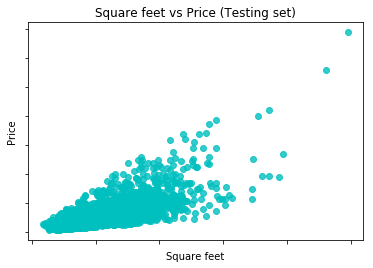

In [3]:

fig, ax = plt.subplots(1)
sns.regplot(x= sqft_test, y= price_test, color = 'c', fit_reg = False, scatter = True)
plt.title('Square feet vs Price (Testing set)')
plt.xlabel('Square feet')
plt.ylabel('Price')
# This shows the ticks on the axis 
ax.set_xticklabels([])
ax.set_yticklabels([])

plt.show()


Now we can safely assume that relationship between square feet and Price is somewhat linear.
Lets try to fit a simple regression equation on the training dataset

In [4]:
lnrg = LinearRegression()
lnrg.fit(sqft_train, price_train)
print(lnrg.coef_, lnrg.intercept_)

[[280.24938351]] [-41474.60113053]


Therefore now we have equation as price = -41474.60 + 280.2493 squarefeet

Now let's predict some prices in the test set and look at the errors associated. Error in regression would generally mean Regression Sum of Squares RSS, where, RSS = SUM[(predictions - RealValue)^2]

In [5]:
predictions = lnrg.predict(sqft_test)
Errors = predictions - price_test
RSS = np.sum(np.square(Errors))
print(RSS)

price    3.999099e+14
dtype: float64


Plotting the predicted values

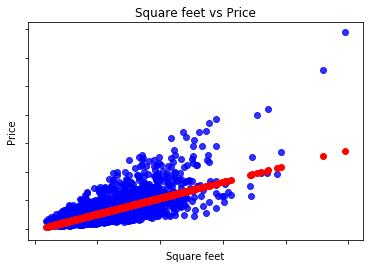

In [6]:
fig, ax = plt.subplots(1)
sns.regplot(x= sqft_test, y= price_test, color = 'b', fit_reg = False, scatter = True)
plt.scatter(x = sqft_test, y = lnrg.predict(sqft_test), color = 'r')
plt.title('Square feet vs Price')
plt.xlabel('Square feet')
plt.ylabel('Price')
ax.set_yticklabels([])
ax.set_xticklabels([])
plt.show()

One of the assumptions of linear regression is of scedasticity. Scedasticity (scatter) plots residuals vs. predictions. If the residuals w.r.t. the predicted values are somewhat uniform throughout the predictions, then the data is said to be linearly dependent on the variate. Let us examine how our prediction errors match with price.

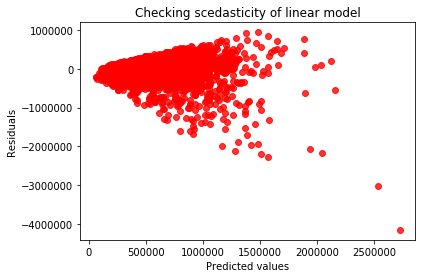

In [7]:
sns.regplot(x= lnrg.predict(sqft_test), y= Errors, color= 'r', fit_reg= False, scatter= True)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Checking scedasticity of linear model')
plt.show()

[The plot above shows that the residuals increase in magnitude with increasing predicted values for the test set. This means that the houses with higher price have way more pull on the residuals than those with lower prices. Also, it would seem that the dependence of a house's price is not very linear on square feet. Let us try to confirm this behavior by looking at the distribution of residuals.](http://)

Text(0.5, 1.0, 'Residual distribution')

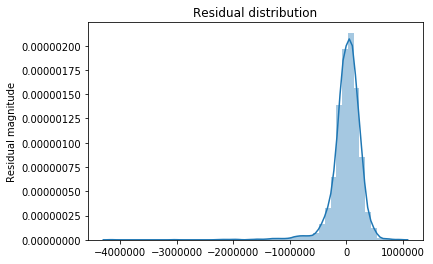

In [8]:
sns.distplot(Errors)
plt.ylabel('Residual magnitude')
plt.title('Residual distribution')

The errors are normally distibuted. Therefore the regression eqation is correct.